Lambda School Data Science

*Unit 4, Sprint 1, Module 3*

---

# Document Classification (Assignment)

This notebook is for you to practice skills during lecture.

Today's guided module project and assignment will be different. You already know how to do classification. You ready know how to extract features from documents. So? That means you're ready to combine and practice those skills in a kaggle competition. We we will open with a five minute sprint explaining the competition, and then give you 25 minutes to work. After those twenty five minutes are up, I will give a 5-minute demo an NLP technique that will help you with document classification (*and **maybe** the competition*).

Today's all about having fun and practicing your skills.

## Sections
* <a href="#p1">Part 1</a>: Text Feature Extraction & Classification Pipelines
* <a href="#p2">Part 2</a>: Latent Semantic Indexing
* <a href="#p3">Part 3</a>: Word Embeddings with Spacy
* <a href="#p4">Part 4</a>: Post Lecture Assignment

# Text Feature Extraction & Classification Pipelines (Learn)
<a id="p1"></a>

## Follow Along 

What you should be doing now:
1. Join the Kaggle Competition
2. Download the data
3. Train a model (try using the pipe method I just demoed)

### Load Competition Data

In [1]:
# Import Statements
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd

# You may need to change the path
train = pd.read_csv('./kaggle/train.csv.zip')
test = pd.read_csv('./kaggle/test.csv')

In [2]:
train.head()

,id,description,ratingCategory
0,1321,"\nSometimes, when whisky is batched, a few lef...",1
1,3861,\nAn uncommon exclusive bottling of a 6 year o...,0
2,655,\nThis release is a port version of Amrut’s In...,1
3,555,\nThis 41 year old single cask was aged in a s...,1
4,1965,"\nQuite herbal on the nose, with aromas of dri...",1


In [34]:
from spacy import load as sp_load

nlp = sp_load('en_core_web_lg')

STOP_WORDS = ['\n', 'it’s', '\r\n', 'It’s', '\xa0', "it's",'it', 'begin','that’s', '\xa0 ', ' ', 'isn’t', 'i’m', "there's", 'i’ve', 'i’d']

PUNCT = ['.', ',', ')', '(', ':', ';']
def tokenize(x):
    
    def check_token(t):
        if t[-1] in PUNCT:
            t =  t[:-1]
        if t[0] in PUNCT:
            t = t[1:]
        return t


    doc = nlp(x.lower())
    
    tokens = ' '.join([check_token(token.lemma_) for token in doc if (token.is_stop == False and token.is_punct == False and token.pos_ != 'PRON' and token.text not in STOP_WORDS )])

    return tokens

def adjs(x):
    
    doc = nlp(x)
    
    adjs = ' '.join([token.text for token in doc if token.pos_ == 'ADJ'])
    
    return adjs

train['token_desc'] = train.description.apply(tokenize)
train['adjs'] = train.token_desc.apply(adjs)

train['token_len'] = train.token_desc.apply(lambda x: len(x.split()))
train['adjs_len'] = train.adjs.apply(lambda x: len(x.split()))


test['token_desc'] = test.description.apply(tokenize)

display(train.head())

train_data = train.token_desc.tolist()
train_target = train.ratingCategory.tolist()

test_data = test.token_desc.tolist()


,id,description,ratingCategory,token_desc,adjs,token_len,adjs_len
0,1321,"\nSometimes, when whisky is batched, a few lef...",1,whisky batch leftover barrel return warehouse ...,leftover canadian white long complex ripe fain...,49,12
1,3861,\nAn uncommon exclusive bottling of a 6 year o...,0,uncommon exclusive bottling 6 year old cask st...,uncommon exclusive old light odd flavorful mid...,47,11
2,655,\nThis release is a port version of Amrut’s In...,1,release port version amrut intermediate sherry...,unused pink vibrant colorful blackcurrant wisp...,48,10
3,555,\nThis 41 year old single cask was aged in a s...,1,41 year old single cask age sherry butt intera...,old single red american harmonious fresh black...,50,12
4,1965,"\nQuite herbal on the nose, with aromas of dri...",1,herbal nose aroma dry tarragon parsley dill ch...,herbal dry balanced orange dry youthful,42,6


In [35]:
from collections import Counter
# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on the token list for each job description
train.token_desc.apply(lambda x: word_counts.update(x.split()))

# Print out the 10 most common words
display(word_counts.most_common(1000))

[('finish', 2996),
 ('fruit', 2211),
 ('oak', 2179),
 ('spice', 2136),
 ('note', 2099),
 ('palate', 2029),
 ('sweet', 1906),
 ('nose', 1879),
 ('whisky', 1754),
 ('vanilla', 1747),
 ('dry', 1549),
 ('year', 1355),
 ('chocolate', 1309),
 ('cask', 1204),
 ('old', 1170),
 ('malt', 1063),
 ('smoke', 1038),
 ('flavor', 1026),
 ('orange', 1015),
 ('whiskey', 974),
 ('caramel', 952),
 ('pepper', 925),
 ('cinnamon', 910),
 ('bottle', 898),
 ('hint', 881),
 ('bourbon', 880),
 ('honey', 842),
 ('sherry', 840),
 ('apple', 825),
 ('toffee', 785),
 ('like', 740),
 ('light', 712),
 ('spicy', 711),
 ('dark', 711),
 ('rye', 711),
 ('age', 660),
 ('barrel', 640),
 ('citrus', 636),
 ('soft', 634),
 ('£', 622),
 ('mature', 605),
 ('ginger', 597),
 ('long', 596),
 ('peat', 595),
 ('fresh', 594),
 ('distillery', 588),
 ('rich', 588),
 ('aroma', 580),
 ('release', 570),
 ('water', 567),
 ('balance', 561),
 ('sweetness', 557),
 ('candy', 553),
 ('lemon', 544),
 ('wood', 520),
 ('black', 507),
 ('good', 491),

In [4]:
from explore_data import get_num_words_per_sample 
from explore_data import plot_sample_length_distribution
from explore_data import plot_class_distribution
from explore_data import plot_frequency_distribution_of_ngrams
import seaborn as sns
sns.set()

Median words per sample: 44.0


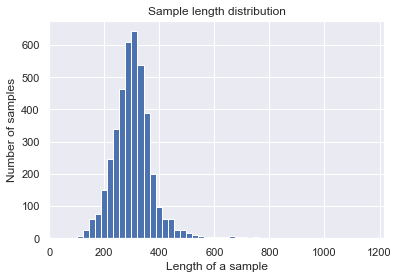

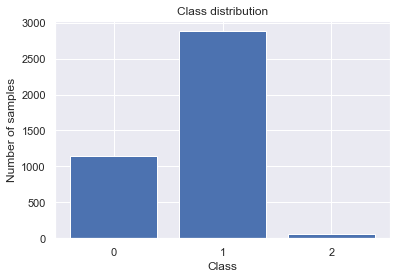

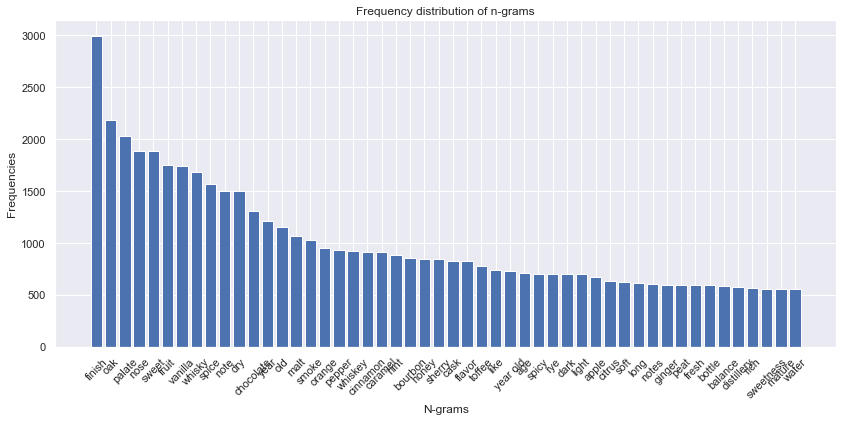

Number of Samples / Median Words per Sample ratio: 92


In [5]:
median_words_per_sample = get_num_words_per_sample(train_data)
print(f'Median words per sample: {median_words_per_sample}')

plot_sample_length_distribution(train_data)

plot_class_distribution(train_target)

plot_frequency_distribution_of_ngrams(train_data,
                                      ngram_range=(1, 2),
                                      num_ngrams=50)

sw_ratio = len(train_data) / median_words_per_sample
print(f'Number of Samples / Median Words per Sample ratio: {int(sw_ratio)}')

### Define Pipeline Components

In [6]:
vect = TfidfVectorizer(stop_words='english', 
                       ngram_range=(1,2),
                       min_df=5,
                      )

clf = LinearSVC(class_weight='balanced')

# Get sparse dtm
dtm = vect.fit_transform(train_data)

# Convert to dataframe
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
display(dtm.shape, dtm.head())

pipe = Pipeline([('vect', vect), ('clf', clf)])

(4087, 7450)

,000,000 bottle,000 bottles,10,10 year,100,100 bottle,100 malt,100 proof,100 rye,...,zested lime,zesty,zesty orange,zesty spice,zinfandel,zing,zingy,zip,zippy,zuidam
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Define Your Search Space
You're looking for both the best hyperparameters of your vectorizer and your classification model. 

In [7]:
# The rule of thumb is that number of rows > 5 times the number of 
parameters = {
    'vect__min_df': (3, 5, 7, 9, 11),
    'vect__max_df': (0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0),
    'clf__C': (0.001, 0.01, 0.1, 0.5, 1.0),
}

grid_search = GridSearchCV(pipe,parameters, cv=5, n_jobs=8, verbose=1)
grid_search.fit(train_data, train_target)




Fitting 5 folds for each of 175 candidates, totalling 875 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   15.9s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   37.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=8)]: Done 875 out of 875 | elapsed:  1.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=5,
                                                        ngram_range=(1, 2),
                                                        no

In [8]:
print(grid_search.best_score_)

# Extract the vectorizer and model from grid_search pipeline
best_model = grid_search.best_estimator_
vect = best_model.named_steps['vect']
clf = best_model.named_steps['clf']

print(vect)

print(clf)

import eli5

eli5.show_weights(clf, vec=vect, top=20)

from sklearn.metrics import accuracy_score

# Evaluate on training data
y_train = grid_search.predict(train_data)
accuracy_score(train_target, y_train)

0.7545926566572798
TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.7, max_features=None,
                min_df=3, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)
LinearSVC(C=0.1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)


/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


0.8801076584291656

### Make a Submission File
*Note:* In a typical Kaggle competition, you are only allowed two submissions a day, so you only submit if you feel you cannot achieve higher test accuracy. For this competition the max daily submissions are capped at **20**. Submit for each demo and for your assignment. 

In [9]:
# Predictions on test sample
pred = grid_search.predict(test_data)

In [10]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [11]:
# Make Sure the Category is an Integer
submission.head()

,id,ratingCategory
0,3461,1
1,2604,1
2,3341,1
3,3764,1
4,2306,1


In [12]:
subNumber = 0

In [13]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./kaggle/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

You're trying to achieve a minimum of 80% Accuracy on your model.

## Latent Semantic Indexing (Learn)
<a id="p2"></a>

## Follow Along
1. Join the Kaggle Competition
2. Download the data
3. Train a model & try: 
    - Creating a Text Extraction & Classification Pipeline
    - Tune the pipeline with a `GridSearchCV` or `RandomizedSearchCV`
    - Add some Latent Semantic Indexing (lsi) into your pipeline. *Note:* You can grid search a nested pipeline, but you have to use double underscores ie `lsi__svd__n_components`
4. Make a submission to Kaggle 


### Define Pipeline Components

In [14]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer

vect = TfidfVectorizer(max_df=0.7, min_df=3, ngram_range=(1, 2))

lsi = TruncatedSVD(n_components=2, algorithm='randomized', n_iter=10)


clf = LinearSVC(C=0.1, class_weight='balanced')

pipe = Pipeline([('vect', vect), ('lsi', lsi), ('clf', clf)])


### Define Your Search Space
You're looking for both the best hyperparameters of your vectorizer and your classification model. 

In [15]:
parameters = {
    'lsi__n_components': (1000, 2000, 3000, 4000),
}

grid_search = GridSearchCV(pipe,parameters, cv=5, n_jobs=8, verbose=1)
grid_search.fit(train_data, train_target)

#pipe.fit(train_data, train_target)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:  6.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=0.7,
                                                        max_features=None,
                                                        min_df=3,
                                                        ngram_range=(1, 2),
                                                        no

In [16]:
from sklearn.metrics import accuracy_score

# Evaluate on training data
y_train = grid_search.predict(train_data)
print(accuracy_score(train_target, y_train))

print(grid_search.best_score_)
print(grid_search.best_params_)



0.8735013457303645
0.7580183329193513
{'lsi__n_components': 3000}


### Make a Submission File

In [17]:
# Predictions on test sample
pred = grid_search.predict(test_data)

In [18]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [19]:
# Make Sure the Category is an Integer
submission.head()

,id,ratingCategory
0,3461,1
1,2604,1
2,3341,1
3,3764,1
4,2306,1


In [20]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./kaggle/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

Continue to apply Latent Semantic Indexing (LSI) to various datasets. 

# Word Embeddings with Spacy (Learn)
<a id="p3"></a>

## Follow Along

In [21]:
# Apply to your Dataset
from math import isclose

def get_avg_word_vectors(docs):
    return  [nlp(doc).vector for doc in docs]
    
def check_vecs(docs):
    vecs = get_avg_word_vectors(docs)
    for idx, vec in enumerate(vecs):
        norm = np.linalg.norm(vec)
        if isclose(norm, 0.0):
            print('norm({docs[idx]}) = {norm}')

In [22]:
# Continue Word Embedding Work Here
X = get_avg_word_vectors(train_data)
len(X) == len(train_data)

True

In [23]:
svm = LinearSVC(C=0.1, class_weight='balanced')

svm.fit(X, train_target)

LinearSVC(C=0.1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [24]:
X_test = get_avg_word_vectors(test_data)
len(X_test) == len(test_data)

True

In [25]:
from sklearn.metrics import accuracy_score

# Evaluate on training data
y_train = svm.predict(X)
accuracy_score(train_target, y_train)

0.7651088818204062

### Make a Submission File

In [26]:
# Predictions on test sample
pred = svm.predict(X_test)

In [27]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [28]:
# Make Sure the Category is an Integer
submission.head()

,id,ratingCategory
0,3461,1
1,2604,1
2,3341,1
3,3764,1
4,2306,1


In [29]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./kaggle/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

What you should be doing now:
1. Join the Kaggle Competition
2. Download the data
3. Train a model & try: 
    - Creating a Text Extraction & Classification Pipeline
    - Tune the pipeline with a `GridSearchCV` or `RandomizedSearchCV`
    - Add some Latent Semantic Indexing (lsi) into your pipeline. *Note:* You can grid search a nested pipeline, but you have to use double underscores ie `lsi__svd__n_components`
    - Try to extract word embeddings with Spacy and use those embeddings as your features for a classification model.
4. Make a submission to Kaggle 

# Post Lecture Assignment
<a id="p4"></a>

Your primary assignment this afternoon is to achieve a minimum of 80% accuracy on the Kaggle competition. Once you have achieved 70% accuracy, please work on the following: 

1. Research "Sentiment Analysis". Provide answers in markdown to the following questions: 
    - What is "Sentiment Analysis"? 
    - Is Document Classification different than "Sentiment Analysis"? Provide evidence for your response
    - How do create labeled sentiment data? Are those labels really sentiment?
    - What are common applications of sentiment analysis?
2. Research our why word embeddings worked better for the lecture notebook than on the whiskey competition.
    - This [text classification documentation](https://developers.google.com/machine-learning/guides/text-classification/step-2-5) from Google might be of interest
    - Neural Networks are becoming more popular for document classification. Why is that the case?